# จำเป็นต้องมี

In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python 
!pip install matplotlib
!pip install numpy

In [1]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np

# ลองทดสอบว่าอ่านข้อมูลได้ไหม 

In [10]:
img_array = cv2.imread("train/angry/Training_3908.jpg")

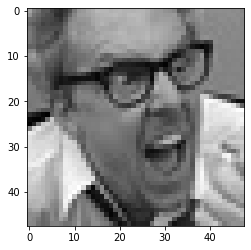

In [11]:
plt.imshow(img_array)

In [12]:
img_array.shape #rgb show

(48, 48, 3)

# STEP 1] ให้อ่้านไฟล์รูปทั่งหมด แล้ว เปลี่ยนเป็นARRAY

1)กำหนดclassesของไฟล์รูปก่อน ตอนเอาไปทำpathจะได้เรียกถูก
2)

In [3]:
classes =["angry" ,"disgust","fear","happy","neutral","sad","surprise"] #list all class

In [4]:
traning_Data=[]
def create_training_data():
    for category in classes:
        path=os.path.join("train",category)
        class_num = classes.index(category) #ให้ค่าlabel 0,1,2,3,4.....
        for img in os.listdir(path):
            try:
                img_array =cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(224,224)) #เปลี่ยนขนาดภาพ
                traning_Data.append([new_array,class_num])
                #plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
                #plt.show
            except Exception as e:
                pass
    
    

เปลี่ยนขนาดรูป ทำไม? =ปกติการใช้รูปขนาด224*224 จะดีกลับMLที่เราจะเอามาใช้มากว่า mobilenet

In [5]:
create_training_data()

In [6]:
print(len(traning_Data))


6436


In [7]:
import random
random.shuffle(traning_Data)

In [6]:
temp = np.array(traning_Data)
temp.shape
#(28709, 2) มีrow = 28709รูป มีcolumอยู่2คือ data(array) กับlabel(class_num)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_17564/2763149192.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(traning_Data)


(799, 2)

In [8]:
x=[]
y=[]
for features,label in traning_Data:
    x.append(features)
    y.append(label)
    
    
x=np.array(x).reshape(-1, 224,224,3) #เปลี่ยนให้เป็น4 มิติ -1คือการเอาถึงตัวสุดทท้าย  
#x.shape =(28709, 224, 224, 3) รูปทั่งหมดขนาด224*224มีรูปละ3channel

In [9]:
# nromalize the data
x=x/255.0; ##255 คือค่าของสีดำ ซึ่งเป็นค่าที่มากที่สุด

In [10]:
Y=np.array(y)

# deep learning model for tranning - Transfer Learning

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
model = tf.keras.applications.MobileNetV2() 

In [28]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Transfer Learning - Tunig 

In [13]:
base_input = model.layers[0].input

In [14]:
base_output = model.layers[-2].output #ไม่เอาบรรทัดสุดท้าย

In [15]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [16]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation ="softmax")(final_output)

In [17]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [18]:
new_model = keras.Model(inputs = base_input, outputs = final_output )

In [37]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [19]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam" , metrics =["accuracy"])

In [20]:
new_model.fit(x, Y, epochs = 15)

Epoch 1/15
202/202 [==============================] - 901s 4s/step - loss: 1.5489 - accuracy: 0.4116
Epoch 2/15
202/202 [==============================] - 848s 4s/step - loss: 1.3207 - accuracy: 0.4997
Epoch 3/15
202/202 [==============================] - 845s 4s/step - loss: 1.1794 - accuracy: 0.5569
Epoch 4/15
202/202 [==============================] - 840s 4s/step - loss: 1.0753 - accuracy: 0.6002
Epoch 5/15
202/202 [==============================] - 848s 4s/step - loss: 0.9851 - accuracy: 0.6401
Epoch 6/15
202/202 [==============================] - 839s 4s/step - loss: 0.9348 - accuracy: 0.6580
Epoch 7/15
202/202 [==============================] - 850s 4s/step - loss: 0.8461 - accuracy: 0.6958
Epoch 8/15
202/202 [==============================] - 853s 4s/step - loss: 0.7851 - accuracy: 0.7183
Epoch 9/15
202/202 [==============================] - 854s 4s/step - loss: 0.7038 - accuracy: 0.7438
Epoch 10/15
202/202 [==============================] - 845s 4s/step - loss: 0.6413 - accura

In [21]:
new_model.save('1000train_model.h5')

In [3]:
new_model= tf.keras.models.load_model('1000train_model.h5')

In [4]:
frame_test =cv2.imread("surprised-kid.jpg")

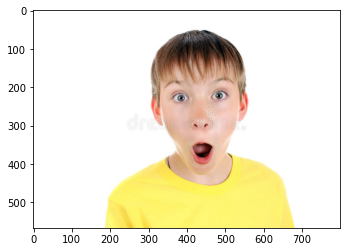

In [5]:
plt.imshow(cv2.cvtColor(frame_test,cv2.COLOR_BGR2RGB))

In [6]:
faceCascade =cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [7]:
gray = cv2.cvtColor(frame_test,cv2.COLOR_BGR2GRAY)

In [8]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame_test[y:y+h, x:x+w]
        cv2.rectangle(frame_test ,(x,y),(x+w,y+h),( 0,255,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex +ew]
                

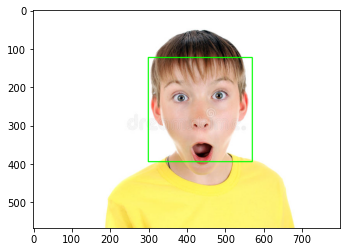

In [9]:
plt.imshow(cv2.cvtColor(frame_test, cv2.COLOR_BGR2RGB))

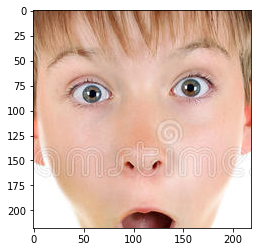

In [10]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [11]:
final_image =cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [12]:
Predic=new_model.predict(final_image)


In [13]:
Predic[0]

array([6.5794666e-05, 1.8148203e-04, 4.1792747e-03, 1.0795669e-01,
       8.8000519e-04, 1.4769582e-05, 8.8672197e-01], dtype=float32)

In [14]:
np.argmax(Predic)

6

In [17]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [18]:
path ='haarcascade_frontalface_default.xml'
font_scale=1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255,255,255)
#make a bblack image
img = np.zeros((500, 500))
text = "Some text in a box"
#gert the wdth and height of the  text box
(text_width, text_height) = cv2.getTextSize(text,font,fontScale=font_scale, thickness=1)[0]
#set the text start position
text_offset_x =10
text_offset_y = img.shape[0] - 25
#make the coordss of the box with a small padding of two pixels
box_coords =((text_offset_x,text_offset_y),(text_offset_x + text_width +2,text_offset_y - text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y),font, fontScale=font_scale,color=(0,0,0),thickness=1)

cap =cv2.VideoCapture(0)
    
while True:
    ret,frame = cap.read()
    faceCascade =cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame ,(x, y), (x+w, y+h), ( 255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len( facess )==0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi =  roi_color[ey: ey+eh, ex: ex +ew]
                
    final_image =cv2.resize(face_roi , (224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0
    
    font =cv2.FONT_HERSHEY_SIMPLEX
    new_model= tf.keras.models.load_model('1000train_model.h5')
    Predic=new_model.predict(final_image)
    
    font_scale =1.5
    font =cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(Predic)==0):
        status = "Angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Draw block BG rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1 +h1),(0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX ,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
        
    elif(np.argmax(Predic)==1):
        status = "disgust"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Draw block BG rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1 +h1),(0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX ,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
        
    elif(np.argmax(Predic)==2):
        status = "fear"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Draw block BG rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1 +h1),(0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX ,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
        
    elif(np.argmax(Predic)==3):
        status = "happy"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Draw block BG rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1 +h1),(0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX ,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
        
    elif(np.argmax(Predic)==4):
        status = "neutral"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Draw block BG rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1 +h1),(0,0,0),-1)
        #add text
        cv2.putText(frame,status,(x1+int(w1/10),y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX ,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w, y+h),(0,0,255))
    
    cv2.imshow('Face Emotion Recognition',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.relase()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
